In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# SibSp = number of siblings/spouses aboard
# Parch = number of parents/children aboard
# Embarked = Port - C=Cherbourg, Q=Queenstown, S=Southampton
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Salonen, Mr. Johan Werner",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.shape

(891, 12)

In [7]:
df_corr = df.corr()
df_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


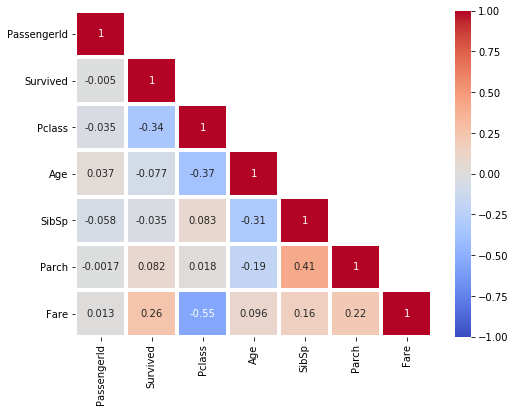

In [8]:
plt.figure(figsize=(8,6))
mask = (1-np.tril(np.ones_like(df_corr)) )
mask = mask.astype(bool)
mask
sns.heatmap(df_corr,linewidths=3,annot=True,cmap='coolwarm',vmin=-1 , mask=mask)

In [9]:
df['Pclass'].value_counts(ascending=True, dropna=False)

2    184
1    216
3    491
Name: Pclass, dtype: int64

In [10]:
df['Fare'].value_counts(bins=5)

(-0.513, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

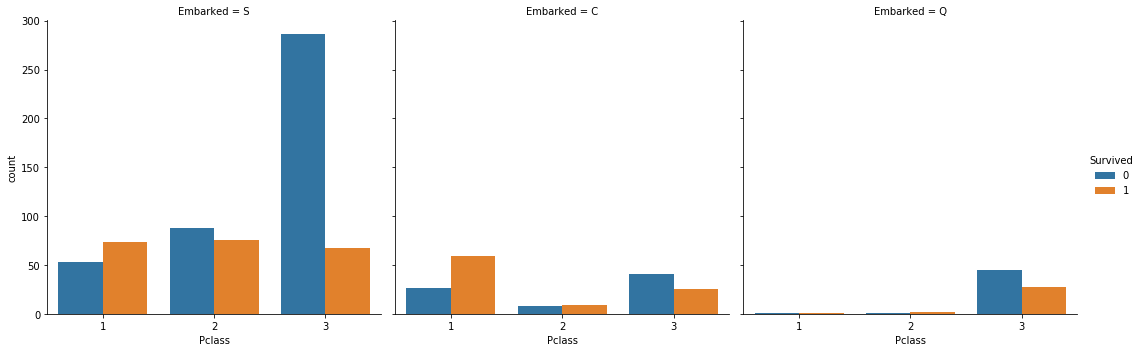

In [11]:
sns.catplot(data=df, x='Pclass', hue='Survived', kind='count', col='Embarked')

In [12]:
df_filter = df[(df.Fare ==0)]
df_filter

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [13]:
df.drop(columns=['Cabin','Ticket'], axis=1, inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [15]:
Embarked_mode = df['Embarked'].mode()[0]
Embarked_mode

'S'

In [16]:
df['Embarked'].fillna(Embarked_mode,inplace=True)

In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [18]:
with pd.option_context('display.max_rows',9999,'display.max_colwidth',100):
    print(df.Name)

0                                                                 Braund, Mr. Owen Harris
1                                     Cumings, Mrs. John Bradley (Florence Briggs Thayer)
2                                                                  Heikkinen, Miss. Laina
3                                            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                                                Allen, Mr. William Henry
5                                                                        Moran, Mr. James
6                                                                 McCarthy, Mr. Timothy J
7                                                          Palsson, Master. Gosta Leonard
8                                       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                                                     Nasser, Mrs. Nicholas (Adele Achem)
10                                                        Sandstrom, Miss. Marguerite Rut
11        

In [19]:
print(pd.get_option('display.max_rows'))
print(pd.get_option('display.max_colwidth'))

60
50


In [20]:
df.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [21]:
df['Title'] = df['Name']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,"Braund, Mr. Owen Harris"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,"Heikkinen, Miss. Laina"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,"Allen, Mr. William Henry"


In [22]:
occ = 2

for i in range(df.shape[0]):
    x=df.loc[i,'Name'].find(',') + 2
    y=df.loc[i,'Name'].find('.', x)
    df.loc[i,'Title'] = df.loc[i,'Name'][x:y]
df.head()   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [23]:
df.Title.value_counts(dropna=False)

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Don               1
the Countess      1
Ms                1
Lady              1
Jonkheer          1
Mme               1
Capt              1
Sir               1
Name: Title, dtype: int64

In [24]:
df[(df.Title=='Miss')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,S,Miss
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,26.5500,S,Miss
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,7.8542,S,Miss
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,8.0292,Q,Miss
...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,13.8583,C,Miss
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,7.2250,C,Miss
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,10.5167,S,Miss
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Miss


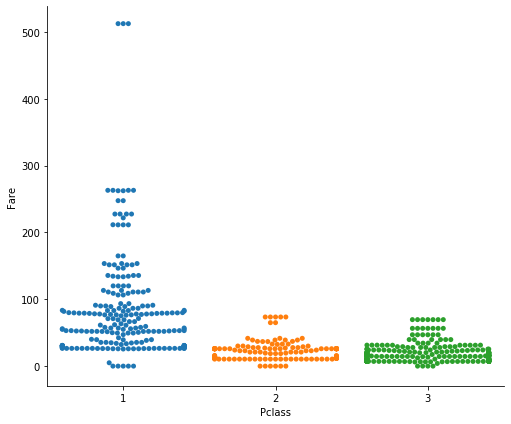

In [25]:
sns.catplot(data=df, y='Fare', x='Pclass', kind='swarm', height=6, aspect=1.2)

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [27]:
df['Pclass'] = df['Pclass'].astype(str)
df = pd.get_dummies(df, columns=['Pclass'])
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,1,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,1,0,0
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,0,0,1


In [28]:
df = pd.get_dummies(df, columns=['Sex'])
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Fare,Embarked,Title,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,Mr,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,Mrs,1,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,Miss,0,0,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,Mrs,1,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,Mr,0,0,1,0,1


In [29]:
df.drop(columns=['Name'], axis=1, inplace=True)
print(df.shape)
df.head()

(891, 13)


,PassengerId,Survived,Age,SibSp,Parch,Fare,Embarked,Title,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,22.0,1,0,7.2500,S,Mr,0,0,1,0,1
1,2,1,38.0,1,0,71.2833,C,Mrs,1,0,0,1,0
2,3,1,26.0,0,0,7.9250,S,Miss,0,0,1,1,0
3,4,1,35.0,1,0,53.1000,S,Mrs,1,0,0,1,0
4,5,0,35.0,0,0,8.0500,S,Mr,0,0,1,0,1


In [30]:
df = pd.get_dummies(df, columns=['Embarked'])
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Title,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,Mr,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,Mrs,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,Miss,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,Mrs,1,0,0,1,0,0,0,1
4,5,0,35.0,0,0,8.0500,Mr,0,0,1,0,1,0,0,1


In [31]:
df['rare_title'] = np.zeros(df.shape[0])
df['rare_title'] = df['rare_title'].astype(int)
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Title,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,rare_title
0,1,0,22.0,1,0,7.2500,Mr,0,0,1,0,1,0,0,1,0
1,2,1,38.0,1,0,71.2833,Mrs,1,0,0,1,0,1,0,0,0
2,3,1,26.0,0,0,7.9250,Miss,0,0,1,1,0,0,0,1,0
3,4,1,35.0,1,0,53.1000,Mrs,1,0,0,1,0,0,0,1,0
4,5,0,35.0,0,0,8.0500,Mr,0,0,1,0,1,0,0,1,0


In [32]:
df.groupby(['Title'])[['Survived']].sum()


,Survived
Title,
Capt,0
Col,1
Don,0
Dr,3
Jonkheer,0
Lady,1
Major,1
Master,23
Miss,127


In [33]:
pd.pivot_table(df, index=['Title'], values=['Survived'], 
               aggfunc=[np.sum,len], margins=True)

,sum,len
,Survived,Survived
Title,,
Capt,0,1
Col,1,2
Don,0,1
Dr,3,7
Jonkheer,0,1
Lady,1,1
Major,1,2
Master,23,40


In [34]:
rare_title_list = ['Capt', 'Col', 'Don', 'Dr', 'Lady', 'Major', 'Master', 'Mlle', 'Mme' 'Sir', 'the Countess']

for i in range(df.shape[0]):
    if df.loc[i, 'Title'] in rare_title_list:
         df.loc[i, 'rare_title'] = 1
    else: df.loc[i, 'rare_title'] = 0

In [35]:
df[(df.rare_title==1)]

,PassengerId,Survived,Age,SibSp,Parch,Fare,Title,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,rare_title
7,8,0,2.00,3,1,21.0750,Master,0,0,1,0,1,0,0,1,1
16,17,0,2.00,4,1,29.1250,Master,0,0,1,0,1,0,1,0,1
30,31,0,40.00,0,0,27.7208,Don,1,0,0,0,1,1,0,0,1
50,51,0,7.00,4,1,39.6875,Master,0,0,1,0,1,0,0,1,1
59,60,0,11.00,5,2,46.9000,Master,0,0,1,0,1,0,0,1,1
63,64,0,4.00,3,2,27.9000,Master,0,0,1,0,1,0,0,1,1
65,66,1,NaN,1,1,15.2458,Master,0,0,1,0,1,1,0,0,1
78,79,1,0.83,0,2,29.0000,Master,0,1,0,0,1,0,0,1,1
125,126,1,12.00,1,0,11.2417,Master,0,0,1,0,1,1,0,0,1
159,160,0,NaN,8,2,69.5500,Master,0,0,1,0,1,0,0,1,1


In [36]:
df.sum()
# Use this to drop categorical variables with the most values - which counts them as reference values

PassengerId                                               397386
Survived                                                     342
Age                                                      21205.2
SibSp                                                        466
Parch                                                        340
Fare                                                     28693.9
Title          MrMrsMissMrsMrMrMrMasterMrsMrsMissMissMrMrMiss...
Pclass_1                                                     216
Pclass_2                                                     184
Pclass_3                                                     491
Sex_female                                                   314
Sex_male                                                     577
Embarked_C                                                   168
Embarked_Q                                                    77
Embarked_S                                                   646
rare_title               

In [37]:
df.drop(columns=['Title', 'Pclass_3', 'Sex_female', 'Embarked_S'], axis=1, inplace=True)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Sex_male,Embarked_C,Embarked_Q,rare_title
0,1,0,22.0,1,0,7.2500,0,0,1,0,0,0
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,0,0,0
3,4,1,35.0,1,0,53.1000,1,0,0,0,0,0
4,5,0,35.0,0,0,8.0500,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,0,1,1,0,0,0
887,888,1,19.0,0,0,30.0000,1,0,0,0,0,0
888,889,0,NaN,1,2,23.4500,0,0,0,0,0,0
889,890,1,26.0,0,0,30.0000,1,0,1,1,0,0


In [38]:
# last thing to do is fix the fare values. Some passengers have 0 value for fare

df[(df['Fare']==0)]

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Sex_male,Embarked_C,Embarked_Q,rare_title
179,180,0,36.0,0,0,0.0,0,0,1,0,0,0
263,264,0,40.0,0,0,0.0,1,0,1,0,0,0
271,272,1,25.0,0,0,0.0,0,0,1,0,0,0
277,278,0,NaN,0,0,0.0,0,1,1,0,0,0
302,303,0,19.0,0,0,0.0,0,0,1,0,0,0
413,414,0,NaN,0,0,0.0,0,1,1,0,0,0
466,467,0,NaN,0,0,0.0,0,1,1,0,0,0
481,482,0,NaN,0,0,0.0,0,1,1,0,0,0
597,598,0,49.0,0,0,0.0,0,0,1,0,0,0
633,634,0,NaN,0,0,0.0,1,0,1,0,0,0


In [39]:
df['Test'] = np.NaN
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Sex_male,Embarked_C,Embarked_Q,rare_title,Test
0,1,0,22.0,1,0,7.2500,0,0,1,0,0,0,NaN
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,0,NaN
2,3,1,26.0,0,0,7.9250,0,0,0,0,0,0,NaN
3,4,1,35.0,1,0,53.1000,1,0,0,0,0,0,NaN
4,5,0,35.0,0,0,8.0500,0,0,1,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,0,1,1,0,0,0,NaN
887,888,1,19.0,0,0,30.0000,1,0,0,0,0,0,NaN
888,889,0,NaN,1,2,23.4500,0,0,0,0,0,0,NaN
889,890,1,26.0,0,0,30.0000,1,0,1,1,0,0,NaN


In [40]:
df.dropna(axis=0, how='any', subset=['Age'], thresh=None, inplace=True)
df.drop(columns=['Test'], inplace=True, axis=1)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Sex_male,Embarked_C,Embarked_Q,rare_title
0,1,0,22.0,1,0,7.2500,0,0,1,0,0,0
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,0,0,0
3,4,1,35.0,1,0,53.1000,1,0,0,0,0,0
4,5,0,35.0,0,0,8.0500,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,39.0,0,5,29.1250,0,0,0,0,1,0
886,887,0,27.0,0,0,13.0000,0,1,1,0,0,0
887,888,1,19.0,0,0,30.0000,1,0,0,0,0,0
889,890,1,26.0,0,0,30.0000,1,0,1,1,0,0


In [41]:
mask = df.Fare == 0
df.loc[mask, 'Fare'] = df['Fare'].mean(skipna=True)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Sex_male,Embarked_C,Embarked_Q,rare_title
0,1,0,22.0,1,0,7.2500,0,0,1,0,0,0
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,0,0,0
3,4,1,35.0,1,0,53.1000,1,0,0,0,0,0
4,5,0,35.0,0,0,8.0500,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,39.0,0,5,29.1250,0,0,0,0,1,0
886,887,0,27.0,0,0,13.0000,0,1,1,0,0,0
887,888,1,19.0,0,0,30.0000,1,0,0,0,0,0
889,890,1,26.0,0,0,30.0000,1,0,1,1,0,0


In [42]:
df.loc[mask]
# Use this as a check. We are good

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Sex_male,Embarked_C,Embarked_Q,rare_title
179,180,0,36.0,0,0,34.694514,0,0,1,0,0,0
263,264,0,40.0,0,0,34.694514,1,0,1,0,0,0
271,272,1,25.0,0,0,34.694514,0,0,1,0,0,0
302,303,0,19.0,0,0,34.694514,0,0,1,0,0,0
597,598,0,49.0,0,0,34.694514,0,0,1,0,0,0
806,807,0,39.0,0,0,34.694514,1,0,1,0,0,0
822,823,0,38.0,0,0,34.694514,1,0,1,0,0,0


In [43]:
df.isnull().sum()

PassengerId    0
Survived       0
Age            0
SibSp          0
Parch          0
Fare           0
Pclass_1       0
Pclass_2       0
Sex_male       0
Embarked_C     0
Embarked_Q     0
rare_title     0
dtype: int64

In [ ]:
# Time to model !!!